#**OBJECTIVE**

*   Data analysis on the impact of the home team and first shooter's in shootout penalties.

*   Data analysis on the outcome percentage of European national teams in games played during UEFA Euro qualification, UEFA Nations League, and FIFA World Cup qualification, where neutral = False, for the last 30 years

In [ ]:
# @title import libraries
# Importing NumPy library for numerical operations
import numpy as np
# Importing Pandas library for data manipulation and analysis
import pandas as pd

#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Importing warnings module to handle warnings
import warnings
# Filtering out warnings to ignore them
warnings.filterwarnings("ignore")


#set  plot style
plt.style.use('Solarize_Light2')

# **df_penalties**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_penalties = pd.read_csv("/content/drive/MyDrive/projects/shootouts.csv")

In [ ]:
df_penalties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           645 non-null    object
 1   home_team      645 non-null    object
 2   away_team      645 non-null    object
 3   winner         645 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB


In [ ]:
df_penalties.describe()

,date,home_team,away_team,winner,first_shooter
count,645,645,645,645,230
unique,568,181,190,175,87
top,2016-06-03,South Africa,Egypt,Argentina,Colombia
freq,5,18,15,15,11


As we can see, only 35% of the games have data on the first shooter. Therefore, we will initially investigate whether there is a home-field advantage in penalty shootouts.

We do not have information about the specific tournament where each shootout took place (friendly, qualification playoffs, knockout stage, final).
Most of these shootouts occur in the knockout stages of tournaments, where there is typically no home-field advantage. Consequently, we do not anticipate a significant difference in the winning percentage between the home and away teams.

In [ ]:
# Create a new column indicating the game's outcome: 1 if the home team wins, and 2 if the away team wins.
df_penalties['result'] = np.where(df_penalties['winner']==df_penalties['home_team'], '1', '2')
df_penalties


,date,home_team,away_team,winner,first_shooter,result
0,1967-08-22,India,Taiwan,Taiwan,NaN,2
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN,1
2,1972-05-07,South Korea,Iraq,Iraq,NaN,2
3,1972-05-17,Thailand,South Korea,South Korea,NaN,2
4,1972-05-19,Thailand,Cambodia,Thailand,NaN,1
...,...,...,...,...,...,...
640,2024-07-05,Venezuela,Canada,Canada,Venezuela,2
641,2024-07-06,England,Switzerland,England,England,1
642,2024-07-06,Uruguay,Brazil,Uruguay,Uruguay,1
643,2024-07-13,Canada,Uruguay,Uruguay,Canada,2


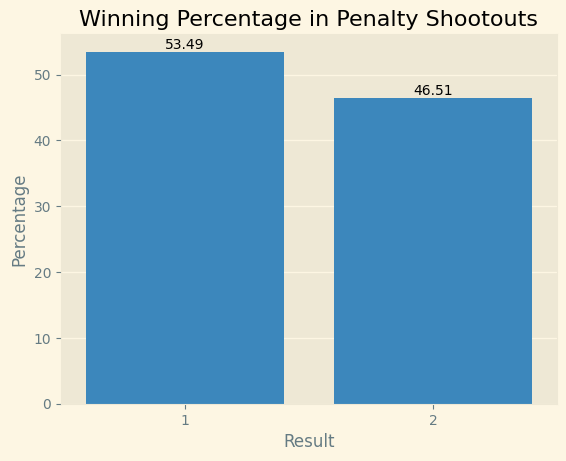

In [ ]:
#plot on winning percentage
plt.figure()
ax =sns.countplot(x=df_penalties.result,stat='percent',order=(1,2)) #set stat as percent to show the percentage and not the count
ax.bar_label(ax.containers[0],fmt="%.2f") # show the height of each bar
ax.set_title('Winning Percentage in Penalty Shootouts')
ax.set_xlabel('Result')
ax.set_ylabel('Percentage')
plt.show()

In [ ]:
print(df_penalties[(df_penalties["home_team"]=="Greece") | (df_penalties["away_team"]=="Greece")])

           date   home_team away_team      winner first_shooter result
121  1988-05-28      Canada    Greece      Canada           NaN      1
458  2014-06-29  Costa Rica    Greece  Costa Rica    Costa Rica      1
633  2024-03-26     Georgia    Greece     Georgia       Georgia      1


Our analysis indicates a slight home-field advantage, although further investigation is needed due to the limited data available on the specific tournaments where these penalty shootouts occurred. For instance, Greece participated in three penalty shootouts: a friendly against Canada in Canada (lost as the away team), a knockout stage match in the 2014 World Cup (lost to Costa Rica, but played in Brazil), and a Euro 2024 qualification final in Georgia (lost to Georgia as the away team). While these examples suggest a potential home-field advantage, the lack of comprehensive data prevents us from drawing definitive conclusions




In [ ]:
#drop all nan values and reset the index
df_penatlies_clear = df_penalties.copy()
df_penatlies_clear.dropna(inplace=True)
df_penatlies_clear = df_penatlies_clear.reset_index(drop=True)
df_penatlies_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           230 non-null    object
 1   home_team      230 non-null    object
 2   away_team      230 non-null    object
 3   winner         230 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


In [ ]:
# Create a new column indicating the game's outcome: first if the first shooter wins, and second if the second shooter wins.
df_penatlies_clear['first_adv'] = np.where(df_penatlies_clear['winner']==df_penatlies_clear['first_shooter'], 'first', 'second')
df_penatlies_clear

,date,home_team,away_team,winner,first_shooter,first_adv
0,1976-06-20,Czechoslovakia,Germany,Czechoslovakia,Czechoslovakia,first
1,1979-05-22,Argentina,Netherlands,Argentina,Argentina,first
2,1980-06-21,Italy,Czechoslovakia,Czechoslovakia,Italy,second
3,1982-07-08,Germany,France,Germany,France,second
4,1984-06-24,Denmark,Spain,Spain,Denmark,second
...,...,...,...,...,...,...
225,2024-07-05,Portugal,France,France,France,first
226,2024-07-05,Venezuela,Canada,Canada,Venezuela,second
227,2024-07-06,England,Switzerland,England,England,first
228,2024-07-06,Uruguay,Brazil,Uruguay,Uruguay,first


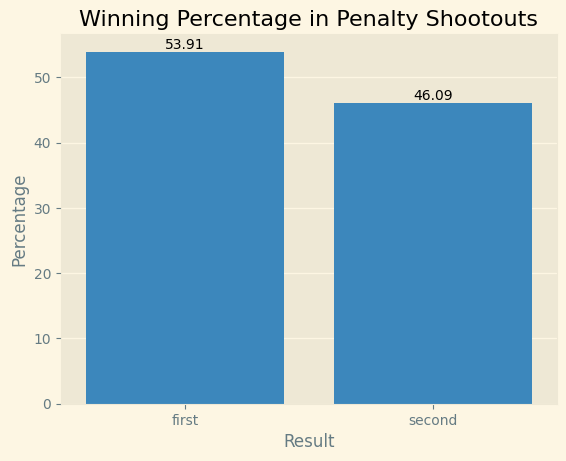

In [ ]:
#plot on winning percentage
plt.figure()
ax = sns.countplot(x = df_penatlies_clear['first_adv'], stat = 'percent', order = ('first', 'second')) #set stat as percent to show the percentage and not the count
ax.bar_label(ax.containers[0], fmt = "%.2f") # show the height of each bar
ax.set_title('Winning Percentage in Penalty Shootouts')
ax.set_xlabel('Result')
ax.set_ylabel('Percentage')
plt.show()

The data suggests a slight advantage for the team that shoots first in penalty shootouts. This could potentially be attributed to the added pressure experienced by the second team, which must attempt to match or surpass the initial score.



In [ ]:
# Let's calculate the percentage of penalty shootout wins for 10 historic national football teams.

teams = ("Argentina","Brazil","England","Germany","France","Italy",'Spain','Netherlands',"Portugal","Uruguay")

In [ ]:
results= pd.DataFrame(columns=['team', 'wins', 'losses']) #new dataframe for our calculation
results['team'] = teams  #put the teams in the column team
results['wins'] =0
results['losses'] =0

wins = 0
losses = 0

for i, team in enumerate(results['team']):  #loop through the teams in the results dataframe
    wins = 0  #set counter for wins
    losses = 0  #set counter for losses

    for index, row in df_penalties.iterrows():  # loop through the penalties dataframe
        if (row['home_team'] == team or row['away_team'] == team):   #if the team we are looking for is found in home or away column
            if row['winner'] == team:                                # and is also the winner the we add +1 at wins
                wins += 1
            else:
                losses += 1                                          # otherwise we add +1 at losses

    # Update wins and losses for the current team in the results DataFrame
    results.at[i, 'wins'] = wins  # put the team wins  in our dataframe at the same i as the team
    results.at[i, 'losses'] = losses  # same for losses


results["games"]= results["wins"] + results["losses"]  #calculate total games
results["win_percentage"] = round((results["wins"]/results["games"])*100,2)  ##calculate win percentage
print(results.sort_values(by="win_percentage",ascending=False).reset_index(drop=True)) #print the results sorted by win percentage


          team  wins  losses  games  win_percentage
0      Germany     6       2      8           75.00
1    Argentina    15       8     23           65.22
2     Portugal     4       3      7           57.14
3       Brazil     9       7     16           56.25
4        Spain     7       6     13           53.85
5      Uruguay     9       8     17           52.94
6        Italy     7       7     14           50.00
7       France     5       6     11           45.45
8      England     4       8     12           33.33
9  Netherlands     2       8     10           20.00


The total number of games played by each team ranges from 7 (Portugal) to 23 (Argentina)

Argentina leads with the most wins, with 15 in 23 games, achieving a win percentage of 65.22%.
Germany follows with 6 wins in 8 games, and an impressive win percentage of 75.00%, the highest among all teams.

The Netherlands has the fewest wins (2) and the lowest win percentage (20%), England also struggles with only 4 wins out of 12 games, giving them a low win percentage of 33.33%.



# **df_results**

In [ ]:
df_results = pd.read_csv("/content/drive/MyDrive/projects/results.csv")
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47593,2024-09-10,Kuwait,Iraq,0,0,FIFA World Cup qualification,Kuwait City,Kuwait,False
47594,2024-09-10,Palestine,Jordan,1,3,FIFA World Cup qualification,Kuala Lumpur,Malaysia,True
47595,2024-09-10,Bahrain,Japan,0,5,FIFA World Cup qualification,Riffa,Bahrain,False
47596,2024-09-10,Indonesia,Australia,0,0,FIFA World Cup qualification,Jakarta,Indonesia,False


In [ ]:
df_results["date"] = pd.to_datetime(df_results["date"], format='mixed',yearfirst=True) #change the date datatype from object to datetime
df_results["year"]=df_results['date'].dt.strftime('%Y') # extract the year to a new column
df_results["year"]=df_results["year"].astype(int) #change the datatype of year into integer

In [ ]:
# make new column for result 1,2 or X
df_results['result'] = df_results.apply(lambda row: "1" if row['home_score'] > row['away_score'] else ("X" if row['home_score'] == row['away_score'] else "2"), axis=1)

In [ ]:
# make a new df for all european games for the three big tournaments with no neutral venues
df_europe_games = df_results[(df_results["home_team"].isin(['Armenia', 'Austria', 'Azerbaijan', 'Belgium',
       'Bosnia and Herzegovina', 'Croatia', 'Cyprus', 'Faroe Islands',
       'Finland', 'Greece', 'Latvia', 'Lithuania', 'Netherlands',
       'Norway', 'Russia', 'San Marino', 'Slovenia', 'Turkey',
       'Liechtenstein', 'Switzerland', 'Albania', 'Andorra', 'Belarus',
       'Bulgaria', 'Denmark', 'France', 'Iceland', 'Italy',
       'North Macedonia', 'Malta', 'Moldova', 'Poland', 'Romania',
       'Slovakia', 'Spain', 'Sweden', 'Ukraine', 'Czech Republic',
       'England', 'Estonia', 'Germany', 'Hungary', 'Republic of Ireland',
       'Luxembourg', 'Northern Ireland', 'Serbia', 'Wales', 'Georgia',
       'Scotland', 'Israel', 'Kazakhstan', 'Portugal', 'Montenegro',
       'Gibraltar', 'Kosovo'])) & (df_results["tournament"].isin(["UEFA Euro qualification" , "UEFA Nations League","FIFA World Cup qualification"])) & (df_results["year"]>1994) & (df_results["neutral"] == False) ]


df_europe_games   = df_europe_games.reset_index(drop=True)
df_europe_games

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result
0,1995-02-22,Malta,Luxembourg,0,1,UEFA Euro qualification,Attard,Malta,False,1995,2
1,1995-03-25,Croatia,Ukraine,4,0,UEFA Euro qualification,Zagreb,Croatia,False,1995,1
2,1995-03-25,Italy,Estonia,4,1,UEFA Euro qualification,Salerno,Italy,False,1995,1
3,1995-03-29,Albania,Moldova,3,0,UEFA Euro qualification,Tirana,Albania,False,1995,1
4,1995-03-29,Austria,Latvia,5,0,UEFA Euro qualification,Salzburg,Austria,False,1995,1
...,...,...,...,...,...,...,...,...,...,...,...
4151,2024-09-10,England,Finland,2,0,UEFA Nations League,London,England,False,2024,1
4152,2024-09-10,Republic of Ireland,Greece,0,2,UEFA Nations League,Dublin,Republic of Ireland,False,2024,2
4153,2024-09-10,Latvia,Faroe Islands,1,0,UEFA Nations League,Riga,Latvia,False,2024,1
4154,2024-09-10,North Macedonia,Armenia,2,0,UEFA Nations League,Skopje,North Macedonia,False,2024,1


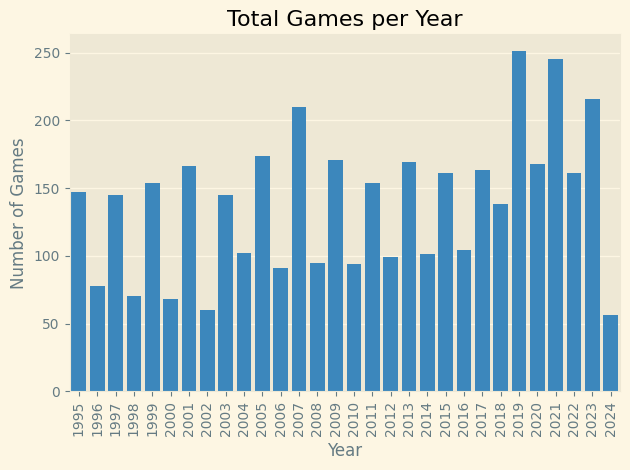

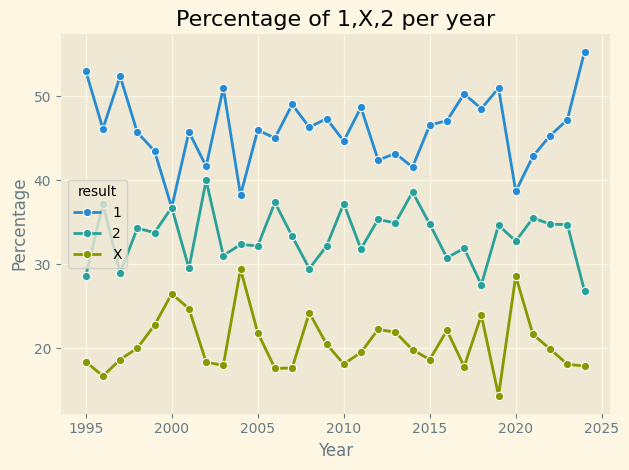

In [ ]:
#@title Let's see how the results have been distributed in the past 30 years

plt.figure()
# Group by Year and Result, and count occurrences
count_data = df_europe_games.groupby(['year', 'result']).size().reset_index(name='Count')

# Calculate total occurrences per Year to get percentages
total_games_per_year = df_europe_games.groupby('year').size().reset_index(name='Total Games')

# Merge the data to get total counts per year
merged_data = pd.merge(count_data, total_games_per_year, on='year')

# Calculate percentage because not every year has the same amount of games
merged_data['Percentage'] = round((merged_data['Count'] / merged_data['Total Games']) * 100,2)

# Create the barplot with percentages
ax = sns.barplot(data=total_games_per_year,x="year", y= 'Total Games')
ax.set_title('Total Games per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create the lineplot with percentages
ax = sns.lineplot(x='year', y='Percentage', hue='result', data=merged_data, marker='o')
ax.set_title('Percentage of 1,X,2 per year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')

plt.tight_layout()
plt.show()




we see a rise on total games after 2000 because the introduction of Europa Nations where it took the place of friendly matches. At the percentage of results we see a drop of winning  of home teams at year 2000 where covid hit us and lot of games took places with low or no spectatross as it did in 2021. We also see low percentage of home wins at years 2000 and 2004 but with no indication why this happened

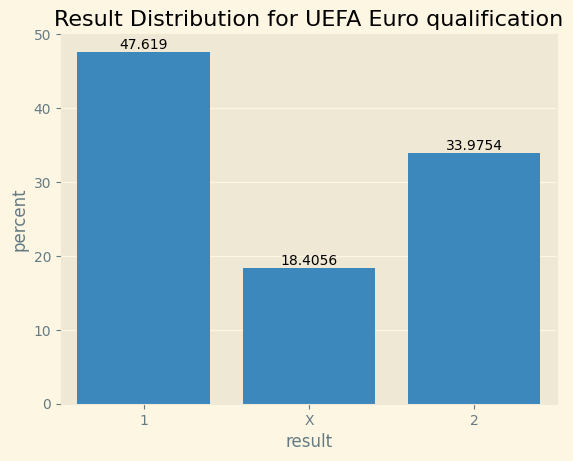

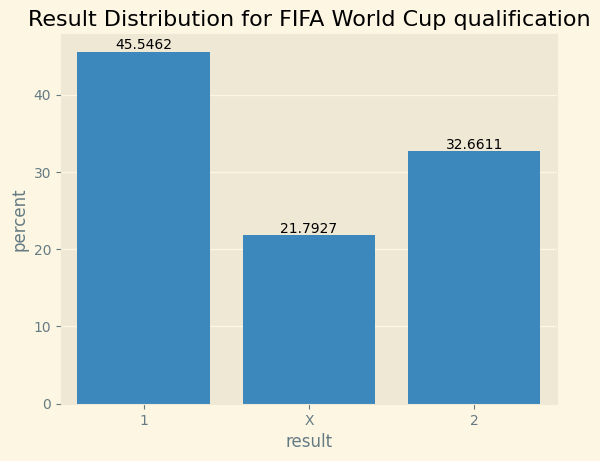

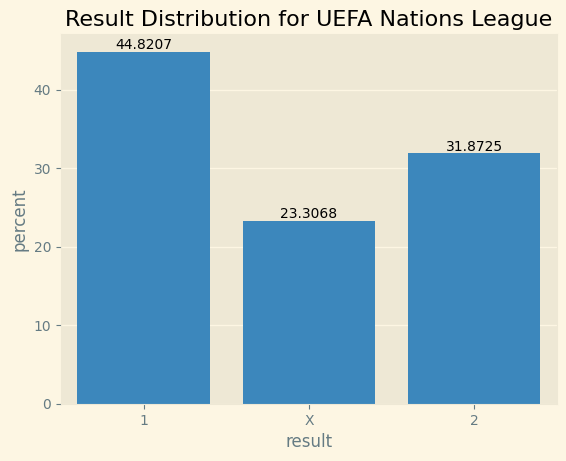

In [ ]:
#result distribution per type of game

plt.figure()
for x in df_europe_games.tournament.unique():
    tournament_data = df_europe_games[df_europe_games['tournament'] == x]
    ax = sns.countplot(x= "result",stat='percent',data=tournament_data,order=("1","X","2"))
    ax.bar_label(ax.containers[0])
    plt.title(f'Result Distribution for {x}')  # Add a title for clarity

    plt.show()


We can see that the percentage of home wins in the Nations League is the lowest among the three formats. This is likely due to the level of competition, as teams in the Nations League face three opponents of comparable strength. With fewer games and lower stakes, teams are often more content with a draw. In contrast, in the other two formats, which involve a straight qualification process, teams tend to fight harder for a win, resulting in a lower percentage of draws compared to the Nations League.








In [ ]:
for z in merged_data.result.unique():

  # Filter the DataFrame for the unique result 1,X or 2
  filtered_data = merged_data[merged_data['result'] == z]
  min_val = filtered_data['Percentage'].min()
  max_val = filtered_data['Percentage'].max()
  mean_val = round(filtered_data['Percentage'].mean(), 2)
  range = max_val - min_val
  variance = round(filtered_data['Percentage'].var(), 2)

   #The code identifies rows where the percentage equals the minimum value. The year of the first row meeting this condition is recorded as the minimum year. same for maximum value
  min_year = filtered_data.loc[filtered_data['Percentage'] == min_val, 'year'].iloc[0]
  max_year = filtered_data.loc[filtered_data['Percentage'] == max_val, 'year'].iloc[0]

  print(f"Minimum for {z} is {min_val} at year {min_year}")
  print(f"Maximum for {z} is {max_val} at year {max_year}")
  print(f"Mean    for {z} is {mean_val}")
  print(f"range   for {z} is {range}")
  print(f"variance for {z} is {variance}")
  print()

Minimum for 1 is 36.76 at year 2000
Maximum for 1 is 55.36 at year 2024
Mean    for 1 is 46.06
range   for 1 is 18.6
variance for 1 is 19.06

Minimum for 2 is 26.79 at year 2024
Maximum for 2 is 40.0 at year 2002
Mean    for 2 is 33.3
range   for 2 is 13.21
variance for 2 is 10.98

Minimum for X is 14.34 at year 2019
Maximum for X is 29.41 at year 2004
Mean    for X is 20.64
range   for X is 15.07
variance for X is 12.37



As the data shows, home wins (1) have the largest variance and range, indicating the greatest variability over time. Away wins are more consistent, with the smallest range and variance, suggesting less fluctuation in their values. In the current year (2024), we are experiencing the highest ever percentage of home wins and the lowest percentage of away wins.









